# Análisis de datos Citi Bike System NYC

## Introducción

El sistema de uso compartido de bicicletas en la ciudad de Nueva York (EE.UU.) publica diariamente gran cantidad de datos de actividad sobre su uso.

Estos datos han dado lugar, como no, a algunos [análisis sobre la evolución de este servicio y posibles factores que puedan influenciar su uso](http://toddwschneider.com/posts/a-tale-of-twenty-two-million-citi-bikes-analyzing-the-nyc-bike-share-system/). En esta práctica vamos a proponer el análisis de datos resumen diarios sobre la utilización de este servicio entre julio de 2013 y noviembre de 2015.

La filosofía de esta práctica es que afiancéis los conocimientos adquiridos así como fomentar que consultéis la documentación en línea tanto de Pandas como de Seaborn. De este modo podréis familiarizaros más con los diferentes métodos disponibles para resolver los ejercicios propuestos. En cada pregunta, se ofrecen consejos sobre partes relevantes de esta documentación relacionadas con las tareas que se piden.

## Procedimiento

La presente práctica se realizará de forma **individual**.

## Entrega

El plazo máximo de entrega de esta práctica finalizará el próximo **domingo 12 de Noviembre de 2017**.
La entrega se realizará a través de la plataforma.

## Descripción de los datos

El archivo de datos que vamos a utilizar puede obtenerse de [esta url](https://raw.githubusercontent.com/toddwschneider/nyc-citibike-data/master/data/daily_citi_bike_trip_counts_and_weather.csv). Se trata de un fichero en formato CSV, que se ha creado mezclando [datos del Citi Bike System](https://www.citibikenyc.com/system-data) con [datos de la National Oceanic and Atmospheric Administration (NOAA)](https://www.ncdc.noaa.gov/cdo-web/datasets/GHCND/stations/GHCND:USW00094728/detail), sobre NYC. El fichero cuenta con las siguientes columnas:

* *date*: fecha del dato, en formato YYYY-MM-DD.
* *trips*: entero positivo, número total de viajes acumulados ese día.
* *precipitation*: entero positivo, cantidad de lluvia total registrada ese día (pulgadas).
* *snow_depth*: entero positivo, altura de nieve (pulgadas).
* *snowfall*: entero positivo, registro de precipitación en forma de nieve (pulgadas).
* *max_temperature*: entero, temperatura máxima registrada (ºF).
* *min_temperature*: entero, temperatura mínima registrada (ºF).
* *average_wind_speed*: entero, velocidad promedio del viento (MPH, millas por hora).
* *dow*: [0, 7]; código de día de la semana, 0 corresponde al domingo.
* *year*: Año del registro.
* *month*: Mes del registro.
* *holiday*: Valor lógico, indica si esa fecha es festivo (TRUE) o no (FALSE).
* *stations_in_service*: Número de estaciones para tomar o dejar bicicletas que estaban en servicio ese día.
* *weekday*: Valor lógico, indica si esa fecha corresponde a un día entre semana (de lunes a viernes, ambos inclusive).
* *weekday_non_holiday*: Valor lógico, indica si la fecha corresponde a un día entre semana festivo.

Los datos están tomados con frecuencia diaria (filas del archivo).

## Ejercicio 1
#### Valor: 25 puntos

Representa mediante Pandas y Seaborn una serie temporal que muestre la evolución del número total de viajes en Citi Bike cada día, y luego por meses. ¿Se puede observar algún patrón cíclico en esta serie de valores?

**Consejo**: La documentación de la función [`pandas.read_csv(...)`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) indica cómo interpretar directamente el índice temporal de los datos de las series a partir de una de las columnas de los datos. Así, el índice se usa en todas las demás columnas del `DataFrame` de Pandas. No obstante, también se puede resolver el ejercicio creando objetos Pandas de tipo `Series`, a partir de las columnas del `DataFrame` inicial.

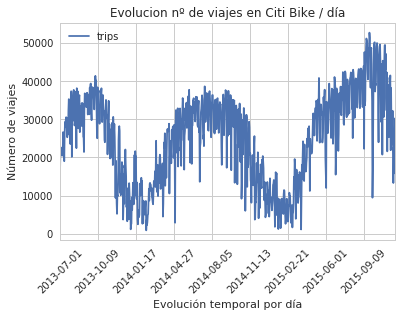

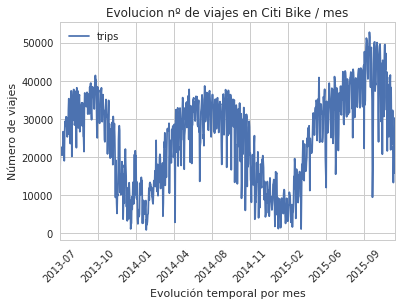

In [141]:
import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
sns.set(style="whitegrid", color_codes=True)

bike_data = pd.read_csv('/home/csanchez/Downloads/daily_citi_bike_trip_counts_and_weather.csv')



# se crea como índice la siguiente columna
gDay = bike_data[['date','trips']].set_index('date').plot();
for item in gDay.get_xticklabels():
    #se rotan 45 grados las etiquetas para una mejor legibilidad
    item.set_rotation(45);
gDay.set_title("Evolucion nº de viajes en Citi Bike / día");
gDay.set_xlabel('Evolución temporal por día');
gDay.set_ylabel('Número de viajes');


# se seleccionan los strings correspondientes al año y mes (formato [YYYY-MM]) para que sea interpretado como índice
bike_data['month_and_date']=bike_data.date.str[0:7];
gMonth = bike_data[['month_and_date','trips']].set_index('month_and_date').plot();
for item in gMonth.get_xticklabels():
    item.set_rotation(45)
gMonth.set_title("Evolucion nº de viajes en Citi Bike / mes");
gMonth.set_xlabel('Evolución temporal por mes');
gMonth.set_ylabel('Número de viajes');    

**EXPLICACIÓN**: se trata de una distribución estacionaria porque el número de viajes no es afectado a lo largo del tiempo. En conclusión, al ser la distribución estacionaria, podríamos predecir el comportamiento que tenga en un futuro.

## Ejercicio 2
#### Valor: 30 puntos

Genera un *scatterplot* que represente el número diario de viajes respecto a la temperatura máxima registrada ese día. ¿Se puede observar alguna correlación entre ambas variables? ¿Puedes buscar una métrica de correlación adecuada para cuantificar la relación entre ambas variables?

**EXPLICACIÓN**: Cuando ambas variables aumentan o disminuyen simultáneamente a un ritmo constante, existe una relación lineal positiva. Los puntos de la gráfica inferior siguen la línea muy de cerca, lo que sugiere que la relación entre las variables es fuerte.

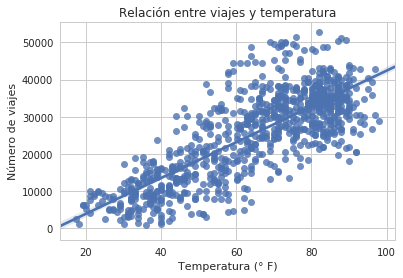

In [142]:
import matplotlib.ticker as ticker

x = bike_data["max_temperature"]
y = bike_data["trips"]

ax = sns.regplot(x,y)
ax.xaxis.set_major_locator(ticker.MultipleLocator(20))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
plt.title('Relación entre viajes y temperatura')
# Texto a mostrar en el eje X
plt.xlabel('Temperatura (° F)')
# Texto a mostrar en el eje Y
plt.ylabel('Número de viajes')
plt.show()

In [74]:
#¿Puedes buscar una métrica de correlación adecuada para cuantificar la relación entre ambas variables?
import scipy
from scipy.stats import pearsonr
corrxy = pearsonr(x,y)[0]
corrxy

0.78283170925575907

**EXPLICACIÓN**: se puede calcular la métrica de correlación mediante el coeficiente de Pearsonr. Este coeficiente tiene un valor de 0.78283170925575907, tal y como se ha calculado arriba .

**COMENTARIO**: De forma más gráfica, podemos mostrar la relación existente entre los viajes y temperaturas .Es decir, a mayor temperatura, mayor será el número de desplazamientos en bicicleta

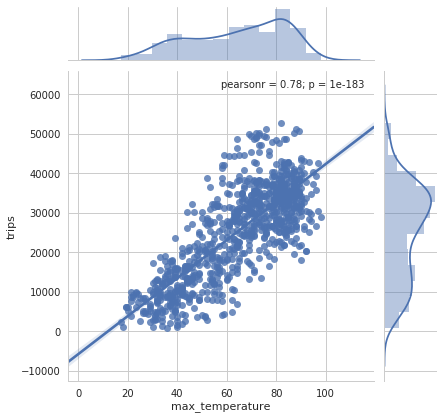

In [143]:
g = sns.jointplot("max_temperature", "trips", data=bike_data, kind="reg")

**EXPLICACIÓN**: Cuando ambas variables aumentan o disminuyen simultáneamente a un ritmo constante, existe una relación lineal positiva. Los puntos de la gráfica superior siguen la línea muy de cerca, lo que sugiere que la relación entre las variables es fuerte.

Representa ahora las dos series de valores (viajes diarios y temperatura máxima) conjuntamente en la misma gráfica, con dos subfiguras en vertical dentro de la misma figura. ¿Podemos extraer alguna conclusión adicional sobre la relación entre ambas variables? Calcula la correlación entre ambas series usando una [ventana temporal deslizante de 90 días](http://pandas.pydata.org/pandas-docs/stable/computation.html#window-functions), con los resultados ajustados al centro de cada ventana. ¿Varían de alguna forma nuestras conclusiones?

**Consejo**: Revisa la documentación sobre la función [`pd.Series.rolling(...)`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.rolling.html), junto con los siguientes enlaces antes de resolver el ejercicio:
1. https://svds.com/avoiding-common-mistakes-with-time-series/
2. https://blog.oraylis.de/2016/03/a-common-pitfall-with-correlations-in-timeseries/

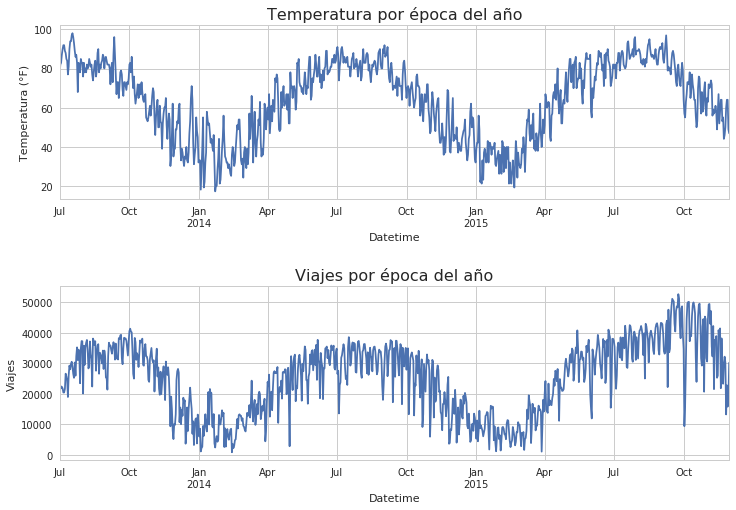

In [144]:
# Representa ahora las dos series de valores (viajes diarios y temperatura máxima) 
# conjuntamente en la misma gráfica, con dos subfiguras en vertical dentro de la misma
# figura. ¿Podemos extraer alguna conclusión adicional sobre la relación entre ambas variables? 

bike_data['Datetime'] = pd.to_datetime(bike_data['date'])
bike_data = bike_data.set_index('Datetime')

serie_max_temperature = pd.Series(bike_data['max_temperature'])
serie_trips = pd.Series(bike_data['trips'])

#Viajes
plt.subplot(212)             
plt.title('Viajes por época del año', fontsize=16)
plt.xticks(rotation='45') 
plt.xlabel('Fecha') 
plt.ylabel('Viajes')
serie_trips.plot(figsize=(10,8) )

#Temperatura
plt.subplot(211)
plt.xticks(rotation='45') # Rotación de los label del eje X
plt.xlabel('Fecha')
plt.ylabel('Temperatura (°F)')
plt.title('Temperatura por época del año',  fontsize=16) 
serie_max_temperature.plot(figsize=(12,8))
plt.subplots_adjust(wspace=0.5, hspace=0.5) 

La correlación entre la temperatura y el rango temporal se muestra a continuación

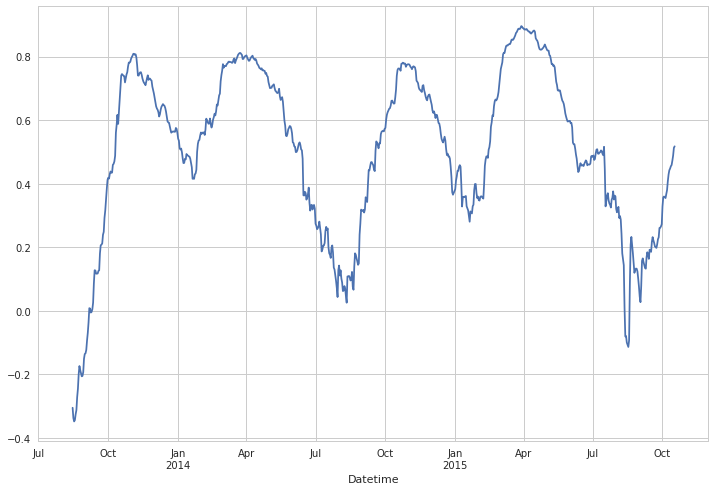

In [145]:
serie_trips.rolling(window=90, center=True).corr(serie_max_temperature).plot(figsize=(12,8))

## Ejercicio 3
#### Valor: 20 puntos

Escoja un diagrama adecuado para representar la diferencia de valores entre el número total de viajes registrados en los días laborables y los registrados en días no laborables (fines de semana y festivos entre semana). ¿A qué conclusiones podemos llegar?

**Consejo**: Revisa la documentación de Seaborn sobre [representación gráfica con datos categóricos](http://seaborn.pydata.org/tutorial/categorical.html#categorical-tutorial) para resolver el ejercicio.

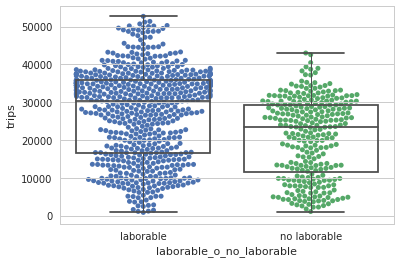

In [146]:
# se añade una columna para poder representar en un gráfico de tipo scatterplot, un dato categórico
# como puede ser que sea o no un día laborable
bike_data['laborable_o_no_laborable'] = np.where(bike_data['weekday_non_holiday'], 'laborable', 'no laborable')


# se representa mediante un gráfico los desplazamientos en bici dependiendo de si es o no un día laborable
ax3 = sns.swarmplot(x="laborable_o_no_laborable", y="trips", data=bike_data, zorder=0)
# plot boxplot
sns.boxplot(x="laborable_o_no_laborable", y="trips", data=bike_data, 
                 showcaps=True,boxprops={'facecolor':'None'},
                 showfliers=True,whiskerprops={'linewidth':1}, ax=ax3)

plt.show()

**COMENTARIO**: En la imagen superior se puede ver la agrupación de datos respecto a si el día es o no laborable. Tal y como se muestra, si el día es laborable se producen muchos más desplazamientos

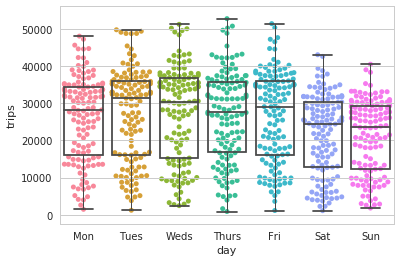

In [147]:
#El domingo está recogido como el primer día de la semana. Como para nosotros lo es el Lunes,
# modificaré los valores almacenados para ordenarlo de manera que el Lunes se considere el primer día
# y el Domingo el  último
bike_data['dow'] = np.where((bike_data['dow']==0), 6,bike_data['dow']-1)
bike_data = bike_data.sort_values(by=['dow'], ascending=[True])
days = {0:'Mon',1:'Tues',2:'Weds',3:'Thurs',4:'Fri',5:'Sat', 6:'Sun'}
bike_data['day'] = bike_data['dow'].apply(lambda x: days[x])

ax3 = sns.swarmplot(x="day", y="trips", data=bike_data, zorder=0)
# plot boxplot
sns.boxplot(x="day", y="trips", data=bike_data, 
                 showcaps=True,boxprops={'facecolor':'None'},
                 showfliers=True,whiskerprops={'linewidth':1}, ax=ax3)

plt.show()

**COMENTARIO**: En el gráfico de la parte superior se puede que de Lunes a Viernes se producen más desplazamientos que los fines de semana

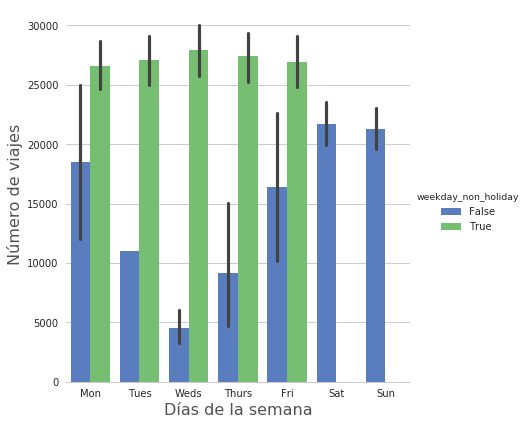

In [148]:
#También se puede mostrar una variable categórica mediante un gráfico de barras 
g2 = sns.factorplot(x="day", y="trips", hue="weekday_non_holiday", data=bike_data,
                   size=6, kind="bar", palette="muted")
g2.despine(left=True)
g2.set_ylabels("Número de viajes",fontsize=16, alpha=0.8)
g2.set_xlabels("Días de la semana",fontsize=16, alpha=0.8)

plt.show()


**EXPLICACIÓN**: También se puede mostrar una variable categórica mediante un gráfico de barras. Como se puede ver, el día de la semana que más viajes se producen es el Miércoles (si es laborable). En cambio,cuando el Miércoles es no laborable, es el día que menos desplazamientos se producen

## Ejercicio 4
#### Valor: 25 puntos

Usando toda la serie de valores que tenemos disponible, ¿cuál es el día de la semana en que realizan en total más viajes en Citi Bike? ¿Y el que menos? ¿Hay diferencias si desglosamos este gráfico por años?

**Consejo**: Analiza cómo podemos representar gráficos en los que los paneles o ejes tengan en cuenta valores de nuestras variables en el tutorial [*Plotting on data-aware grids*](http://seaborn.pydata.org/tutorial/axis_grids.html) de la documentación de Seaborn.

In [97]:
#dia de la semana que más viajes hay en total
dia_max=bike_data.groupby(['day'])['trips'].sum().nlargest(1)
dia_max

day
Weds    3446195
Name: trips, dtype: int64

In [99]:
#dia de la semana que menos viajes hay
dia_min=bike_data.groupby(['day'])['trips'].sum().nsmallest(1)
dia_min


day
Sun    2680568
Name: trips, dtype: int64

In [149]:
#dia de la semana que más viajes hay en total por año
dia_max_per_year=bike_data.groupby(['year','day'])['trips'].sum()
print (dia_max_per_year.reset_index()
                      .sort_values(['year','trips'],ascending=False)
                      .set_index(['year','trips']))

                day
year trips         
2015 1455081   Weds
     1410914  Thurs
     1382575    Fri
     1373155   Tues
     1358640    Mon
     1079036    Sat
     1074443    Sun
2014 1252340   Tues
     1223958    Mon
     1214090   Weds
     1212028    Fri
     1204818  Thurs
     995941     Sun
     978041     Sat
2013 777024    Weds
     774846    Tues
     746516     Fri
     729552   Thurs
     722835     Mon
     676228     Sat
     610184     Sun


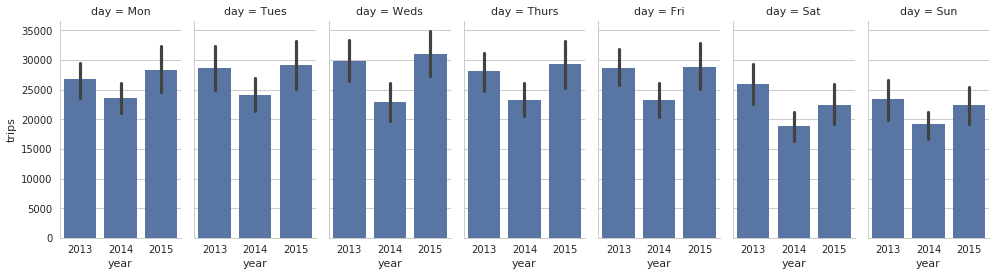

In [150]:
# si desglosamos los datos por día de la semana respecto al año, se puede ver que el Miércoles es el día ocn más viajes
g = sns.FacetGrid(bike_data, col="day", size=4, aspect=.5)
g.map(sns.barplot, "year", "trips")

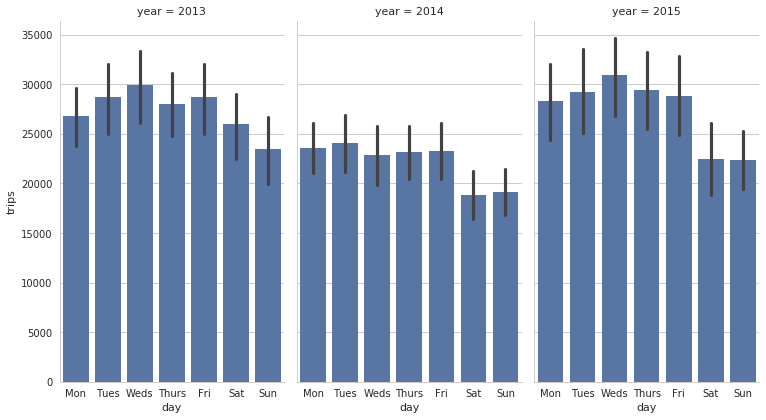

In [151]:
g = sns.FacetGrid(bike_data, col="year", size=6, aspect=.6)
g.map(sns.barplot, "day", "trips")

**EXPLICACIÓN**: Como regla general podríamos deducir que, en general, el día de la semana que se suelen producir más desplazamientos es el Miércoles y, el que menos, es el Domingo. Si agrupamos por años, en el año 2015 se producen más desplazamientos que los dos años anteriores y, el año 2014 es el que menos desplazamientos se producen de los tres. Una de las posibles causas puede ser que la temperatura de dicho año fue inferior respecto de los años 2013 y 2015

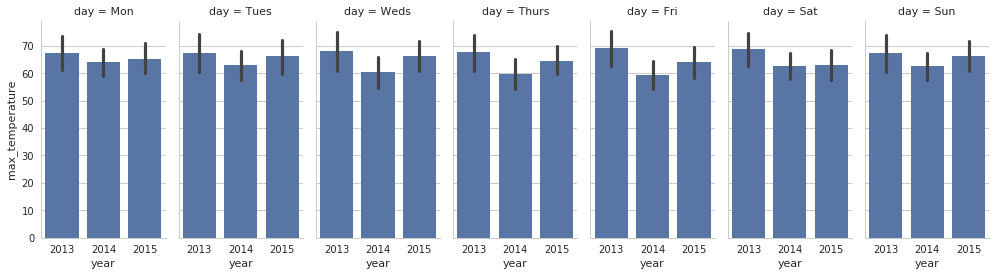

In [153]:
g = sns.FacetGrid(bike_data, col="day", size=4, aspect=.5)
g.map(sns.barplot, "year", "max_temperature")

**EXPLICACIÓN**: Efectivamente, como se puede ver en la figura de la parte superior, en lo que concierne a todos los días de la semana, el año 2014 tuvo temperaturas máximas inferiores a las de los años 2013 y 2015.

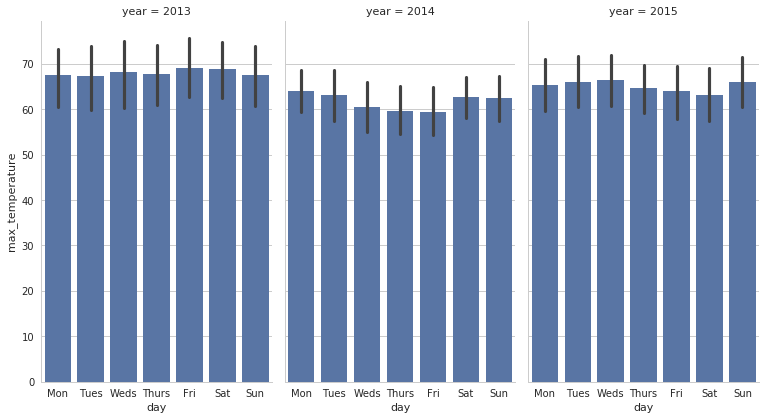

In [154]:
g = sns.FacetGrid(bike_data, col="year", size=6, aspect=.6)
g.map(sns.barplot, "day", "max_temperature")

**CONCLUSIÓN**: Podemos concluir que una de las posibles causas de que el año 2014 haya menos desplazamiento respecto a los otros dos años, es que su temperatura máxima fue inferior.
Por otro lado, se podría afirmar que la temperatura es un factor determinante para escoger el desplazamiento en bicicleta.